# Problem 2.1 - Travelleing waves
Written by Oscar Rosman

In [147]:
from sympy import symbols, Eq, solve, diff
import numpy as np
import matplotlib.pyplot as plt

### Task a) -Dimensionless time

Solved by hand, see latex equations in report.

In [148]:
u, p, q, e = symbols('u p q epsilon')

u1 = 0
u2 = (q-1)/2 + ((q-1)**2/4 + -q*(1-p)/p)**0.5
u3 = (q-1)/2 - ((q-1)**2/4 + -q*(1-p)/p)**0.5

u_dot = p*u*(1-u/q) - u/(1+u)

### Task b) - Simulate dynamics

$\rho = 0.5, q = 8 $

C_1 = 0.17674089784376104
C_2 = -0.7092198581560284
C_3 = 0.17959770114942528


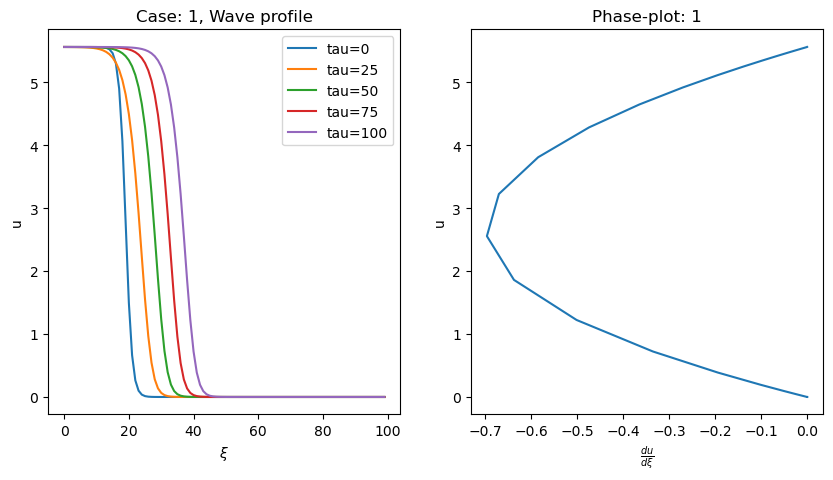

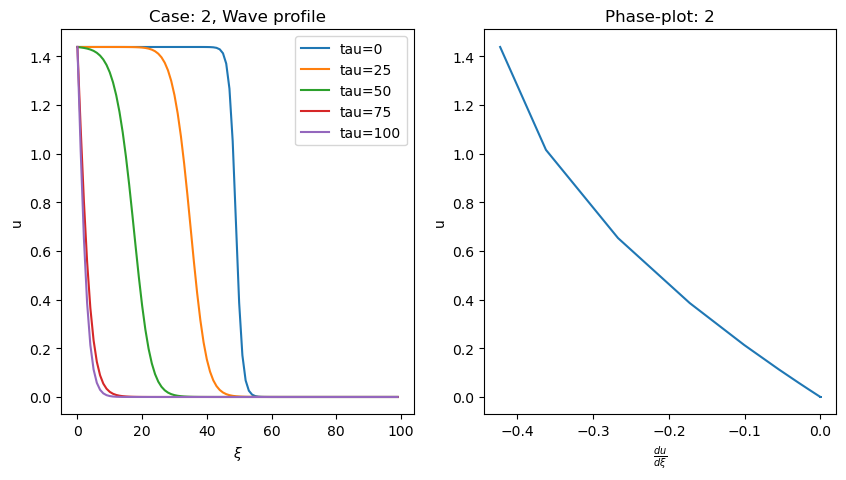

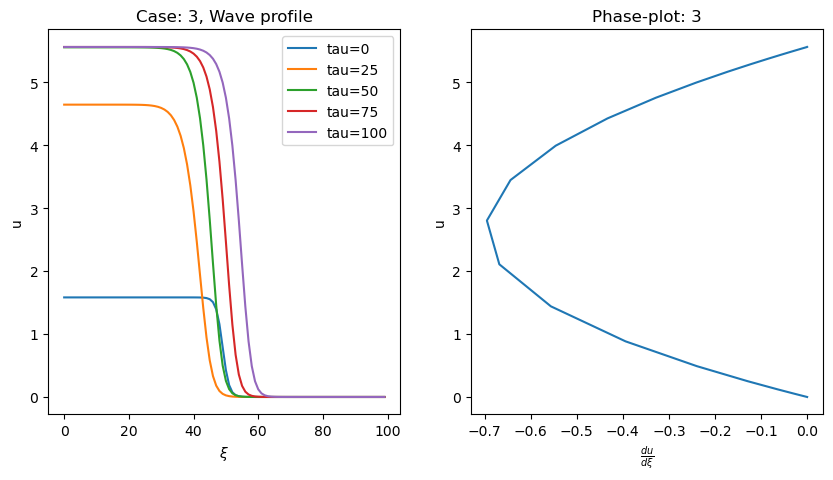

In [149]:
# Parameters:
rho = 0.5
X = 0.17956
p = rho
q = 8
L = 100
dt = 10**-2
tMax = 100
tSteps = int(tMax/dt)
h = 1

u1 = 0
u2 = (q-1)/2 + ((q-1)**2/4 + -q*(1-p)/p)**0.5
u3 = (q-1)/2 - ((q-1)**2/4 + -q*(1-p)/p)**0.5

def CalculateUSeries(U, XI, i, rampFunction):
    uSeries = np.zeros((L, tSteps+1))
    xi0 = XI

    # Determine initial conditions
    xi = np.arange(1, L+1)
    #InitialConditions = lambda x, x0, u0: u0/(1 + np.exp(x-x0))
    uSeries[:, 0] = [rampFunction(x, xi0, U) for x in xi]

    # Calculate the time series of u for different values of xi
    Euler1 = lambda u, dt, rho, q: u + dt*(rho*u*(1-u/q) - u/(1+u))
    hDerivative = lambda uPlus, uMinus, u, h: (uPlus-2*u+uMinus)/(h**2)
    Euler2 = lambda uPlus, uMinus, u, dt, rho, q, h: u + dt*(rho*u*(1-u/q) - u/(1+u) + hDerivative(uPlus, uMinus, u, h))

    for t in range(tSteps):
        for x in range(L):
            if x == 0 or x == L-1:
                uSeries[x, t+1] = Euler1(uSeries[x, t], dt, rho, q)
            else:
                uPlus = uSeries[x+h, t]
                uMinus = uSeries[x-h, t]
                uSeries[x, t+1] = Euler2(uPlus, uMinus, uSeries[x, t], dt, rho, q, h)

    FindVelocity(uSeries, i)
    PlotFunction(uSeries, i)

def PlotFunction(uSeries, case):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(uSeries[:, 0], label="tau=0")
    ax[0].plot(uSeries[:, int(tSteps/4)], label=f"tau={tMax/4:.0f}")
    ax[0].plot(uSeries[:, int(tSteps/2)], label=f"tau={tMax/2:.0f}")
    ax[0].plot(uSeries[:, int(3*tSteps/4)], label=f"tau={3*tMax/4:.0f}")
    ax[0].plot(uSeries[:, -1], label=f"tau={tMax:.0f}")
    ax[0].set_xlabel("$\\xi$")
    ax[0].set_ylabel("u")
    ax[0].set_title(f"Case: {case}, Wave profile")
    ax[0].legend()

    ax[1].plot(np.diff(uSeries[:, -1]), uSeries[:-1, -1] )
    ax[1].set_xlabel('$\\frac{du}{d\\xi}$')
    ax[1].set_ylabel("u")
    ax[1].set_title(f"Phase-plot: {case}")

def FindVelocity(uSeries, i):
    if i == 1:
        x1 = 10/((np.argmax(uSeries[40,:]>2)-np.argmax(uSeries[30,:]>2))*dt)
        print(f"C_{i} = {np.abs(x1)}")
    elif i == 2:
        x2 = 10/((np.argmax(uSeries[30, :]<0.5)-np.argmax(uSeries[20,:]<0.5))*dt)
        print(f"C_{i} = {x2}")
    elif i == 3:
        pass
        x3 = 5/((np.argmax(uSeries[55,:]>2)-np.argmax(uSeries[50,:]>2))*dt)
        print(f"C_{i} = {x3}")



InitialConditions = lambda x, x0, u0: u0/(1 + np.exp(x-x0))
# Case I
CalculateUSeries(u2, 20, 1, InitialConditions)

# Case II
CalculateUSeries(u3, 50, 2, InitialConditions)

# Case III
CalculateUSeries(u3*1.1, 50, 3, InitialConditions)



#u0 = 


Case I) We see a wave travelling from left to right. The velocity c is numerically estimated to $ c_1 = 0.177$. With the velocity being positive the fixed point $u_3^* = 0$ is unstable and $u_1 = ...$ is stable.

Case II) We see a wave travelling from right to left (opposite from case I) with a velocity estimated to $c_2 = -0.71$. With the velocity being negative the trajectory moves away from the unstable fixed point at $u_2^*$ towards the this time stable fixed point at $u_3^* = 0$.

Case III) We see a wave travelling from left to right like case I with a velocity estimated to $c_3 = 0.179$. Yet again with the velocity being positive the wave travels away from the unstable fixed point at $u_3 = 0$ towards the stable fixed point at $u_2^*$.

### Part c) Model local outbreak

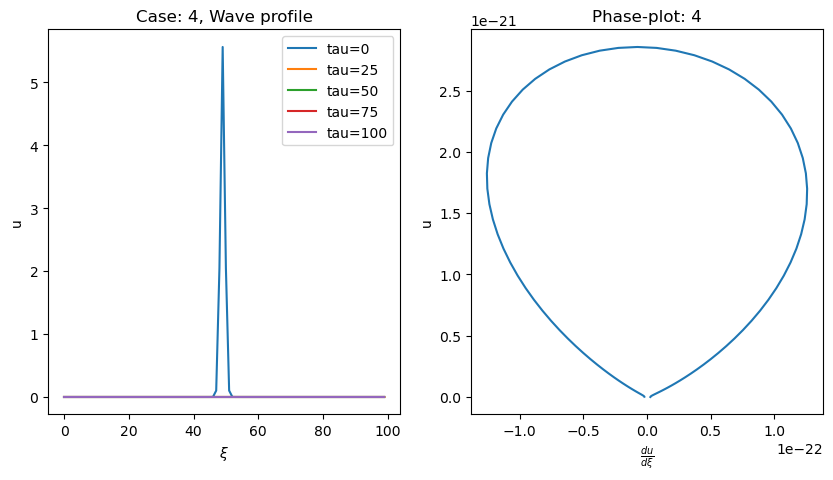

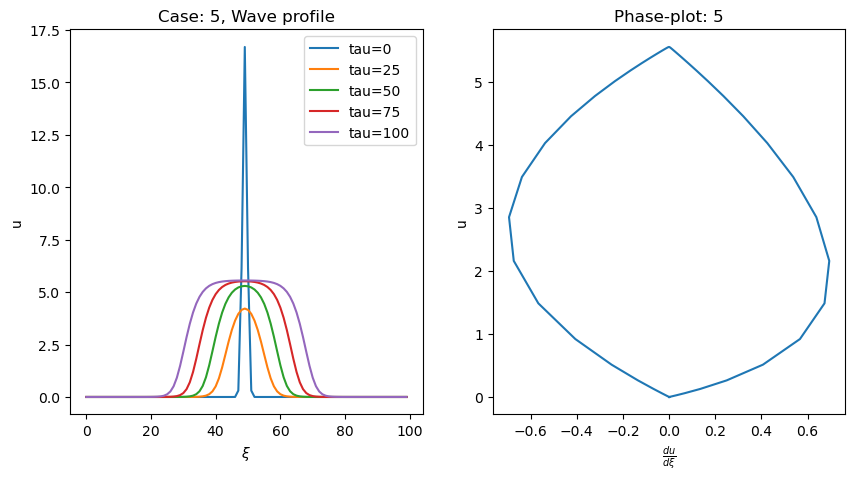

In [150]:
smoothPeakFunction = lambda x, x0, u0: u0*np.exp(-(x-x0)**2)

# Case I

CalculateUSeries(u2, 50, 4, smoothPeakFunction)

# Case II

CalculateUSeries(3*u2, 50, 5, smoothPeakFunction)



In the first case $u_0 = u_1^* $ we see a very sharp peak that dies down quickly as we move away from it. In the second case where $u_0 = 3u_1^*$ we also see a sharp peak and waves traveling away from it in both directions. In the second case the density of the population is high enough to support the waves spreading into the nearby areas of the habitat.